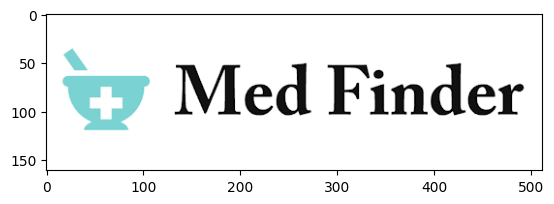

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
logo = cv2.imread("newlogo.png")
plt.imshow(logo[...,::-1])

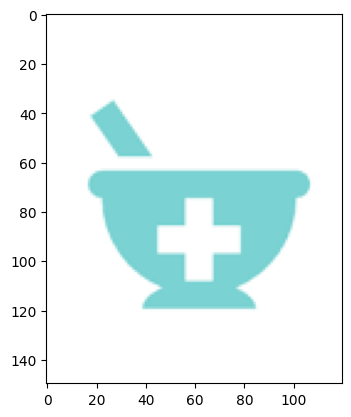

In [57]:
newlogo = logo[0:150,0:120]
plt.imshow(newlogo[...,::-1])

In [51]:
newlogo[newlogo < 255] = 0

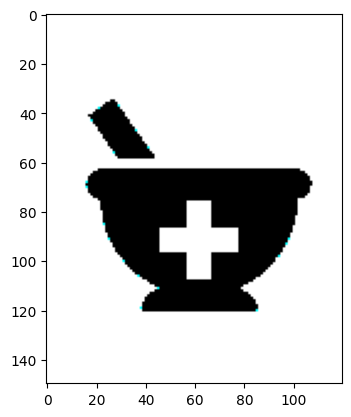

In [42]:
plt.imshow(newlogo[...,::-1])

In [60]:
def change_logo_color(image_path, new_color, output_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    
    # Convert BGR to RGB (OpenCV loads images in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Define the new color in RGB format
    new_color = np.array(new_color[::-1])  # Reverse the order (RGB to BGR)

    roi = img[:,0:120]
    non_roi = img[:,120:]
    # Mask of non-white pixels (assuming white as the original logo color)
    white = np.all(roi == [255, 255, 255], axis=-1)
    
    # Change all non-white pixels to the new color
    roi[~white] = new_color

    img = np.concatenate((roi,non_roi),axis=1)
    
    plt.imshow(img)
    
    # Save the modified image
    cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

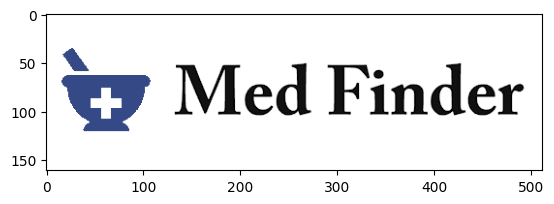

In [62]:
# Path to the logo image
logo_path = "logo.png"

# New color (R, G, B) - specify the color you want to change the logo to
new_logo_color = (134, 73, 53)  # Red color in this example

# Output path for the modified logo
output_logo_path = "modified_logo.png"

# Change the color of the logo
change_logo_color(logo_path, new_logo_color, output_logo_path)